# Tema 1: **Estadística Descriptiva**

## Introducción

La Estadística Descriptiva se utiliza para describir un conjunto de datos, resumirlos y presentarlos de forma que sean fáciles de interpretar. La estadística descriptiva hace uso de resúmenes, tablas, graficas e indicadores (de tendencia central, dispersión, posición y forma) con el propósito de identificar y dar solución a un problema determinado. Se resaltan tres aspectos de la estadística descriptiva:

1. Determinación de tendencias o patrones.

2. Mostrar y cuantificar la dispersión.

3. Descubrir la forma de los datos.

Para esto se utilizan algunos indicadores o medidas de tendencia central, dispersión, posición y forma:

<br>

| **Medidas de tendencia central** | Indicador/Estadístico |
|----------------------------------|-----------------------|
| **Medidas de tendencia central** | - Media aritmética<br> - Media ponderada<br> - Mediana<br> - Moda<br> - Media geométrica |
| **Medidas de dispersión**        | - Rango<br> - Rango intercuartil<br> - Desviación estándar<br> - Varianza<br> - Coeficiente de variación |
| **Medidas de posición**          | - Cuartiles<br> - Percentiles |
| **Medidas de forma**             | - Asimetría<br> - Curtosis |

<br>

También está entre los objetivos de la Estadística Descriptiva el presentar los datos de tal modo que permitan sugerir o aventurar cuestiones a analizar en mayor profundidad, así como estudiar si pueden mantenerse algunas suposiciones necesarias en determinadas inferencias como la de simetría, normalidad, homocedasticidad, entre otras.


### Instalación y Carga de Librerías

In [ ]:
#=======#
# Datos #
#=======#
import pandas as pd
import numpy as np
#from pandasql import sqldf

#==========#
# Gráficos #
#==========#
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
import seaborn as sns
%matplotlib inline

#=====================#
# Tools para modelado #
#=====================#
#!pip install scikit-learn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.metrics import roc_curve
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier

#=====================#
# Metricas del modelo #
#=====================#
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

### Funciones Personalizadas

In [ ]:
#=============================================#
# Porcentaje de valores perdidos por variable #
#=============================================#
def resum_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() *100/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje'])
    return missing_data

#======================================================#
# dataFrame de resumen de posición de valores perdidos # 
#======================================================#
def posmissing(df):
    lista_miss = np.where(df.isna())
    v1 = pd.Series(np.ndarray.tolist(lista_miss[0]))
    v2 = pd.Series(np.ndarray.tolist(lista_miss[1]))
    resumen_vna = pd.concat([v1, v2], axis=1, keys=['posicion_fila', 'posicion_columna'])
    return resumen_vna

#=======================================#
# Construcción función que cuenta ceros #
#=======================================#
def count_zeros(df):
    total = (df == 0).astype(int).sum(axis=0)
    percent = ((df == 0).astype(int).sum(axis=0) *100/df.count())
    missing_data = pd.concat([total, percent], axis=1, keys=['Total_ceros', 'Porcentaje'])
    return missing_data.sort_values(by='Porcentaje', ascending=False)

#==================================================================#
# Importancia de las variables dentro de un arbol de clasificación #
#==================================================================#
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

### Lectura, preparación y exploración de datos

Informacion de 6 meses, de clientes y delincuentes transando en el extrerior con tarjeta presente, es decir NO internet, compras presenciales	
Los datos faltantes en las distacias generalmente es porque el cliente no tiene ningun recorrido que permita hacer el cálculo.	


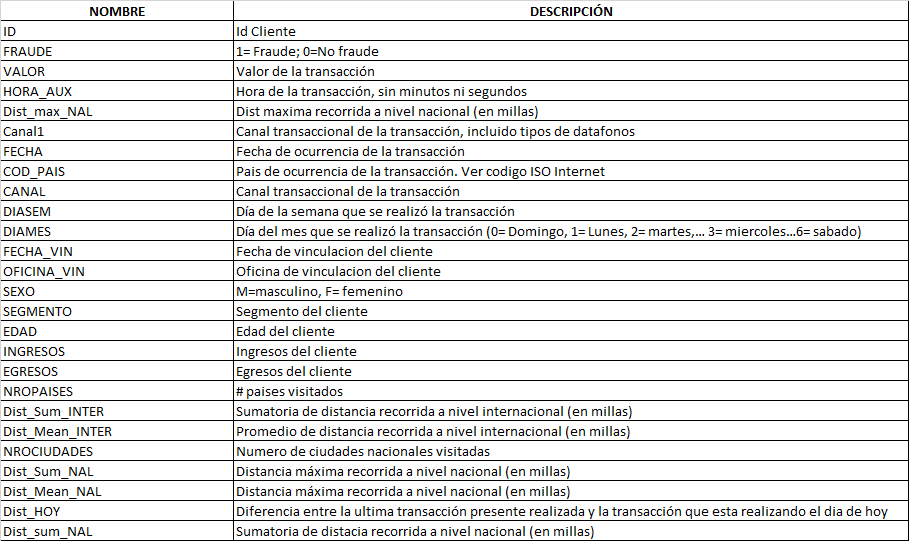

In [ ]:
#===============================================#
# Lee un archivo CSV y lo carga en un DataFrame #
#===============================================#
data = pd.read_csv(r"/Users/duvancatano/Documents/Estadistica_Analitica_Datos_UTPC/data.csv", sep=";")
# Lee un archivo Excel y lo carga en un DataFrame #
#pd.read_excel()

In [ ]:
#==========================================#
# Muestra las primeras filas del DataFrame #
#==========================================#
pd.set_option('display.max_columns', None)
data.head(10)

In [ ]:
#=========================================#
# Muestra las últimas filas del DataFrame #
#=========================================#
data.tail()

In [ ]:
#=========================#
# Dimensión del DataFrame #
#=========================#
print("Dimensión de Data es : ", data.shape)

In [ ]:
#========================================================#
# Proporciona un resumen de la información del DataFrame #
#========================================================#
data.info()

In [ ]:
#=================================================================#
# Proporciona estadísticas descriptivas de las columnas numéricas #
#=================================================================#
data.describe()

In [ ]:
#====================================================#
# Devuelve los nombres de las columnas del DataFrame #
#====================================================#
data.columns.tolist()
#data.columns

In [ ]:
#==============================================#
# Devuelve el índice (etiquetas) del DataFrame #
#==============================================#
data.index

### Funciones adicionales de PANDAS y NUMPAY

In [ ]:
#========#
# PANDAS #
#========#
# data.drop(): Elimina filas o columnas especificadas del DataFrame.
# data.dropna(): Elimina filas con valores faltantes.
# data.fillna(): Llena los valores faltantes con un valor especificado.
# data.groupby(): Agrupa el DataFrame por una o más columnas.
# data.merge(): Realiza una combinación (join) entre dos DataFrames.
# data.concat(): Concatena dos o más DataFrames.
# data.pivot_table(): Crea una tabla dinámica.
# data.melt(): Convierte un DataFrame de formato ancho a largo.
# data.sort_values(): Ordena el DataFrame por los valores de una o más columnas.
# data.apply(): Aplica una función a lo largo de un eje del DataFrame.
# data.duplicated(): Devuelve una serie booleana que indica si una fila es duplicada.
# data.nunique(): Devuelve el número de valores únicos por columna.
# data.isnull(): Devuelve una máscara booleana indicando valores nulos.
# data.corr(): Calcula la correlación entre las columnas del DataFrame.

#========#
# NUMPAY #
#========#
# data.mean(): Calcula la media de los elementos de una matriz.
# data.median(): Calcula la mediana de los elementos de una matriz.
# data.std(): Calcula la desviación estándar de los elementos de una matriz.
# data.var(): Calcula la varianza de los elementos de una matriz.
# data.sum(): Calcula la suma de los elementos de una matriz.
# data.min(): Devuelve el valor mínimo de una matriz.
# data.max(): Devuelve el valor máximo de una matriz.
# data.argmin(): Devuelve el índice del valor mínimo de una matriz.
# data.argmax(): Devuelve el índice del valor máximo de una matriz.
# data.sort(): Ordena una matriz.
# data.unique(): Devuelve los valores únicos de una matriz.
# data.transpose(): Transpone una matriz.
# data.reshape(): Cambia la forma de una matriz.
# data.concatenate(): Concatena dos o más matrices.
# data.hstack(): Apila matrices horizontalmente.
# data.vstack(): Apila matrices verticalmente.
# data.dot(): Calcula el producto punto de dos matrices.

In [ ]:
# ===========================================#
# Dimensiones de las bases de datos objetivo #
# ===========================================#
print("No Fraude : ", data[data['FRAUDE'] == 0].shape)
print("Fraude : ", data[data['FRAUDE'] == 1].shape)

In [ ]:
#=============================================#
# Porcentaje de casos de fraude transaccional #
#=============================================#
print("Porcentaje de clase Minoritaria:",round((data[data['FRAUDE']==1].shape[0]/(data[data['FRAUDE']==1].shape[0]+data[data['FRAUDE']==0].shape[0]))*100,3),"%")

### Conteo de datos faltantes y nulos 

In [ ]:
#==============================================#
# Porcentaje de valores faltantes por variable #
#==============================================#
resum_missing(data)

In [ ]:
#==========================================#
# Resumen de posición de valores faltantes #   
#==========================================#
posmissing(data)

In [ ]:
#=======================================#
# Construcción función que cuenta ceros #
#=======================================#
count_zeros(data)

In [ ]:
#==================================================#
# Tabla de Frecuencias de una variables categórica #
#==================================================#

# Calcular las frecuencias
frequencies = data['CANAL'].value_counts().sort_index()

# Convertir las frecuencias en un DataFrame
frequency_table = frequencies.reset_index()
frequency_table.columns = ['CANAL', 'Frequency']

# Calcular las frecuencias relativas
frequency_table['Relative Frequency'] = frequency_table['Frequency'] / frequency_table['Frequency'].sum()

# Calcular las frecuencias acumuladas
frequency_table['Cumulative Frequency'] = frequency_table['Frequency'].cumsum()

# Calcular las frecuencias relativas acumuladas
frequency_table['Cumulative Relative Frequency'] = frequency_table['Relative Frequency'].cumsum()

# Mostrar la tabla de frecuencias
#print(frequency_table)
frequency_table

## 1. Medidas de tendencia central

Son estadísticos que llevan información respecto al valor central o representativo del conjunto de datos. Sólo se utilizan en datos cuantitativos, bien sea, continuos o discretos.

Entre los principales indicadores de
tendencia central se consideran los
siguientes:

  1. La media aritmética
    
  2. La media ponderada
    
  3. La mediana
    
  4. La moda
    
  5. La media geométrica

    
Estas medidas pueden calcularse con los datos originales en la base de datos, como también cuando están resumidos en una tabla de distribución de frecuencias; hablamos entonces de “Datos no agrupados” y de “Datos agrupados”, respectivamente.

### 1.1 La media aritmética $\bar{x}$

Recordemos que la media poblacional se denota por , la media muestral porx y el tamaño de la muestra como n. La media aritmética, media o simplemente promedio es la medida de tendencia central más conocida y ampliamente usada. La media se obtiene sumando todos los valores en una población o muestra y se divide entre el número de valores sumados:

$$ \overline{x} = \frac{x_1 + x_2 + \ldots + x_n}{n} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

La media es una medida muy simple y conocida para describir el “centro” de un conjunto de datos. La media es única. Un conjunto de datos numéricos tiene una y sólo una media.

La media es el centro de gravedad de la distribución, es decir, toma en cuenta todos y cada uno de los datos. La interpretación física es que si en el punto donde se ubica la media aritmética se colocara un punto de apoyo y luego se ubicaran los datos, el sistema quedaría en equilibrio.

Es importante discutir un poco más esta propiedad; es una propiedad deseable pero también permite mirar lo inadecuado del promedio como medida resumen para presentar datos con valores extremos o atípicos (muy grandes o muy pequeños). Cuando estos valores extremos se promedian con otros, pueden afectar la media, a tal grado que se vuelve debatible su valor como una descripción razonable respecto al “centro” de los datos.

### 1.2 La media ponderada $\bar{x}_w$

En el cálculo de la media aritmética se asume que cada observación es de igual importancia. Sin embargo, en ciertos casos, puede querer darse mayor peso a algunas de las observaciones, entonces se hace uso de la media ponderada.

$$ \overline{x}_w = \frac{\sum_{i=1}^{n}x_iw_i}{\sum_{i=1}^{n}w_i}  $$

En donde $x_i$ es cada observación individual y $w_i$ es el peso o ponderación asignada a cada observación. Un ejemplo puede ser la obtención de la media ponderada de la nota de un examen en la que se asigna distinta importancia (peso) a cada una de las partes de que consta el examen.

### 1.3 La mediana $M_e$

La mediana se conoce también como el percentil 50 ($P_{50}$) ó el cuartil dos ($Q_2$), dado que es la medida que se encuentra en la posición central del conjunto de datos, es decir, es la medición que divide a la distribución en dos partes con igual cantidad de datos, deja a su izquierda el 50% de las
observaciones y a su derecha el otro 50%. 

Su cálculo requiere que el conjunto de datos este ordenado ascendentemente, entonces la mediana de un conjunto n de datos es el dato que esta en la posición central:

$\bullet$ Si el número de datos es impar, la mediana es el dato de la posición de la mitad, en este caso la mediana es uno e los valores medidos en la muestra.

$\bullet$ Si el número de datos es par, la mediana es el promedio de los dos datos centrales. En este caso, la mediana podría no ser uno de los valores medidos.

$$
M_e = \begin{cases} 
x_{\left(\frac{n+1}{2}\right)} & \text{si } n \text{ es impar}, \\
\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2} + 1\right)}}{2} & \text{si } n \text{ es par}.
\end{cases}
$$

La interpretación de la mediana es: Al menos el 50% de los datos son menores o igual que la mediana y al menos el 50% de los datos son mayores o igual que ella. Entre las propiedades de la mediana se encuentran las siguientes:

1. Es única. Un conjunto de datos sólo tiene una mediana.
    
2. Simplicidad. Es muy sencillo calcularla.
    
3. Los valores extremos no tienen efectos importantes sobre la mediana, lo que sí ocurre con la media.

Aunque antes de calcularse, los datos deben estar ordenados, esto no es problema, en la práctica, con el uso del computador

### 1.4 La moda $M_o$

La Moda es la medición que más se repite o que mayor frecuencia presenta. Una distribución puede tener varias modas en un caso dado, o no tener moda.

### 1.5 La media geométrica $G$

Algunas veces se tienen algunos datos que siguen un patrón exponencial (1, 2, 4, 8, 16,etc.) o un patrón logarítmico (1/2, 1/4, 1/8,1/16, etc. ). Por ejemplo, para determinar cuántos anticuerpos hay presentes en el suero, se diluyen muestras de suero, secuencialmente, en diluciones de 50% hasta que no podamos detectar más anticuerpos. De este modo, la primera muestra de suero tiene potencia completa, luego se diluye 50% para llevar la muestra a ½ de su potencia original. Como continuamos diluyendo la muestra al 50%, la potencia de la muestra decrece a 1/2, 1/4, 1/8, 1/16, y así sucesivamente. Algunas veces decimos que estas diluciones se miden en una escala logarítmica. Una buena medida resumen para tales datos es la “media geométrica”.

La media geométrica es el promedio de un conjunto de datos medidos en una escala logarítmica. Se calcula como la raíz n-ésima del producto de n observaciones; es decir:

$$G = \sqrt[n]{ x_1 x_2 \ldots x_n} = \left( \prod_{i=1}^{n} x_i \right)^{\frac{1}{n}}$$

Donde $x_1, x_2, \dots x_n$ son los datos en escala logarítmica.

In [ ]:
#==============================#
# Medidas de tendencia central #
#==============================#

from scipy.stats import gmean

media =  round(np.mean(data['VALOR']), 2)
mediana =  round(np.median(data['VALOR']), 2)
moda =  round(pd.Series(data['VALOR']).mode()[0], 2)
media_geo = round(gmean(data['NROPAISES']), 2)

#=========================#
# Imprimir los Resultados #
#=========================#

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Media geométrica: {media_geo}")

## 2.  Medidas de variabilidad o dispersión

Son valores que indican qué tanta variabilidad o variación hay entre las mediciones del conjunto de datos con respecto a su medida de tendencia central. Si todos los valores medidos son iguales, no hay dispersión, pero si no todos son iguales, entonces existe dispersión en los datos. La magnitud de la dispersión es pequeña cuando los valores, aunque diferentes, son cercanos entre sí.

Comúnmente; se utilizan muchas medidas de dispersión para describir los datos, pero para el alcance de este curso, es importante considerar las más utilizadas:

1. El rango
2. El rango intercuartil
3. La varianza y la desviación estándar
4. El coeficiente de variación

### 2.1 Rango $R$

También conocido como amplitud. El Rango es la diferencia entre el dato mayor y el menor dato del conjunto de datos. Proporciona una idea vaga acerca de que tan grande es la dimensión o amplitud en la que se mueven los valores de la variable.

$$R = X_{max} – X_{min}$$

donde $X_{max}$ es el Dato mayor y $X_{min}$ ew el Dato menor.

El rango indica la extensión total de los datos. Un rango mayor sugiere que los datos están más dispersos, es decir, hay una mayor variabilidad entre el valor más bajo y el más alto.
Un rango menor sugiere que los datos están más concentrados o cercanos entre sí.

Una de las limitaciones del rango es que solo considera los valores extremos y no tiene en cuenta la distribución de todos los datos. Por lo tanto, puede ser influenciado significativamente por valores atípicos (outliers).

### 2.2 Rango intercuartil $RI$

Es necesario definir que los cuartiles son valores que dividen los datos en cuatro partes iguales.

El cuartil 1 ($Q_1$) es el valor que es mayor que el 25% de los datos.

El cuartil 2 ($Q_2$) es el valor que es mayor que el 50% de los datos. El cuartil 2 coincide con la mediana.

El cuartil 3 ($Q_3$) es el valor que es mayor que el 75% de los datos.

El rango intercuartil es la distancia entre el primer y el tercer cuartil:

$$ RI=Q_3 -Q_1$$


El RI es una medida robusta de dispersión menos sensible a los valores atípicos (outliers) que el rango total, ya que solo considera la mitad central de los datos, la cual indica la extensión de la mitad central de los datos, proporcionando una idea de la dispersión de los datos centrales sin ser influenciado por los valores extremos.

Es empleado para la detección de atípicos; los valores que están muy por encima de $Q_3+1.5×RI$ o muy por debajo de $Q_1−1.5×RI$ suelen considerarse outliers.

### 2.3 Varianza y desviación estándar

La mejor medida de dispersión y la más generalizada es la varianza o su raíz cuadrada, la desviación estándar o desviación típica. La varianza poblacional se representa con el símbolo $\sigma^2$ (la letra griega sigma, léase sigma al cuadrado. La varianza muestral se simboliza con $S^2$ (léase $S$ al cuadrado). 

La desviación estándar se denota así: 

$\bullet$ : $\sigma$ para la población. 

$\bullet$ : $S$ para la muestra. 

La varianza muestral y la desviación estándar muestral son medidas o indicadores de qué tan cerca o tan lejos están las medidas respecto al valor central o media. Por lo tanto, si sabemos que cuando los valores de un conjunto de observaciones se encuentran ubicados cerca de su media, su dispersión es menor que cuando se encuentran lejos; entonces, podemos pensar intuitivamente que es posible medir la dispersión en función de la dispersión alrededor de la misma. La varianza muestral se calcula con la siguiente fórmula:

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

Donde:


$\bullet$ : $n$ es el tamaño de la muestra.

$\bullet$ : $x_i$ representa la $i-$ésima observación.

$\bullet$ : $\bar{x}$ es la media muestral.

Como se puede apreciar en la forma matemática, la varianza es el promedio de las desviaciones entre los datos y la media elevadas al cuadrado. Esta es una forma bastante compleja de medir la dispersión de los valores, ya que es muy grande en magnitud y sus unidades son las de la variable original al cuadrado. Por ello, en el reporte de la información, se prefiere presentar la desviación estándar, $S$, la cual se obtiene como la raíz cuadrada de la varianza. Entonces, la desviación estándar estará en las mismas unidades de la variable que se está midiendo.

### 2.4 Coeficiente de variación

El Coeficiente de variación es una medida útil para relacionar la media aritmética y la desviación estándar muestrales. Se denota por CV y se define así:

$$CV = \frac{S}{\bar{x}}\times 100$$

El coeficiente de variación es una de las medidas de dispersión más útiles que se tienen a nivel descriptivo; permite establecer el grado de homogeneidad (validez interna) del conjunto de datos a la vez que facilita comparar (a simple vista) el grado de dispersión de dos conjuntos de datos correspondientes a variables que tienen las mismas o diferentes unidades.
Como el CV es independiente de las unidades usadas, es útil en la comparación de la variabilidad de varias muestras diferentes, donde cada una tenga promedios distintos.

In [ ]:
#=======================#
# Medidas de dispersión #
#=======================#
rango = round(np.ptp(data['VALOR']),2)
rango_ic = round(np.percentile(data['VALOR'], 75) - np.percentile(data['VALOR'], 25),2)
varianza = round(np.var(data['VALOR']), 2)
desviacion_estandar = round(np.std(data['VALOR']),2)
coef_var = round(desviacion_estandar/media,2)*100

#=========================#
# Imprimir los Resultados #
#=========================#

print(f"Rango: {rango}")
print(f"Rango Intercuartílico: {rango_ic}")
print(f"Varianza: {varianza}")
print(f"Desviación Estándar: {desviacion_estandar}")
print(f"Coeficiente de Variación: {coef_var}")

In [ ]:
data.columns

In [ ]:
# EGRESOS #
media1 =  round(np.mean(data['EGRESOS']), 2)
desviacion_estandar1 = round(np.std(data['EGRESOS']),2)
coef_var1 = round(desviacion_estandar1/media1,2)*100

# INGRESOS #
media2 =  round(np.mean(data['INGRESOS']), 2)
desviacion_estandar2 = round(np.std(data['INGRESOS']),2)
coef_var2 = round(desviacion_estandar2/media2,2)*100

In [ ]:
coef_var1, coef_var2

In [ ]:
#======================================#
# Resumen de Estadísticas Descriptivas #
#======================================#
data.describe()

## 3. Medidas de posición

La media y la mediana son casos especiales de la familia de parámetros de localización, otros son los percentiles y cuartiles. Son valores que describen la ubicación de un conjunto de datos dentro de una distribución las cuales nos ayudan a entender dónde se sitúan los datos en relación con el resto del conjunto.

### 3.1 Cuartiles

Se definió anteriormente a los cuartiles como números que dividen a los datos ordenados en cuatro partes con igual porcentaje.


 1. Primer cuartil $Q_1$ : es el número tal que a lo más una cuarta parte de los datos, 25%, tiene un valor más pequeño que Q1 y a lo más tres cuartas partes 75% tiene un valor mayor.

 2. Segundo cuartil $Q_2$ : es la mediana, debajo de Q2 están el 50% de los datos y arriba están el 50% de los datos.

 3. Tercer cuartil $Q_3$ : es un número tal que a lo más tres cuartas partes de los datos, 75% tiene un valor más pequeño que Q3 y a lo más una cuarta parte tiene un valor mayor, el 25% de los datos.

Cuando los datos no están agrupados, una forma de resumir la información de cada cuartil, es:

$\bullet$ $Q_1 = \frac{n+1}{4}$ - ésima observación ordenada.

$\bullet$ $Q_2 = \frac{n+1}{2}$ - ésima observación ordenada.

$\bullet$ $Q_3 = \frac{3(n+1)}{4}$ - ésima observación ordenada.


Tener presentee qie así obtenemos la posición para luego ir a buscar los cuartiles en la base de datos ordenados.

Las medidas de posición son muy útiles cuando se quiere tener una idea de la densidad con que se distribuyen las mediciones a lo largo del rango de valores.

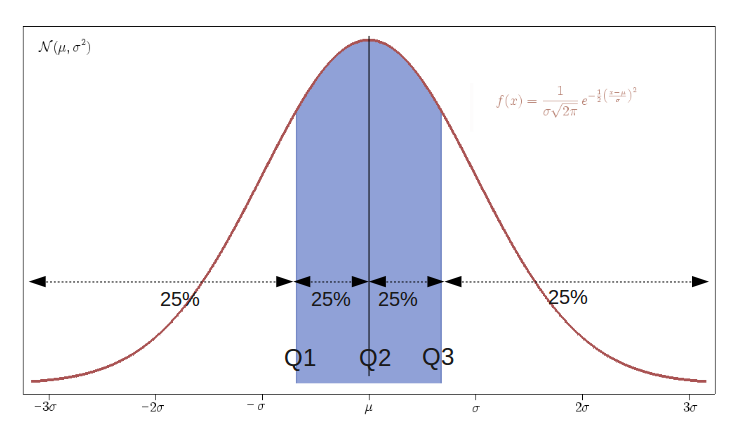

### 3.2 Percentiles $P$

Si un conjunto de datos está ordenado por magnitud, los valores (de la variable) que dividen a los datos en 100 partes iguales se llaman percentiles; de igual manera, los valores que los dividen en 10 partes iguales se llaman deciles.
Los subíndices en $P$ sirven para distinguir un percentil de otro. El décimo percentil ó percentil 10, por ejemplo, se designa como $P_{10}$, el percentil 70 se designa por $P_70$, y así sucesivamente.
En general la localización del $k$ - ésimo percentil $P_k$ está dada por:

$$P_k = \frac{k(n+1)}{100}$$ 

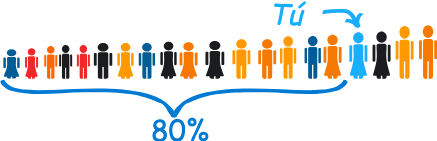

In [ ]:
#========================================================#
# Cálculo de percentiles adicionales 80, 85, 90, 95 y 99 #
#========================================================#
percentil_80 = round(np.percentile(data['VALOR'], 80),2)
percentil_85 = round(np.percentile(data['VALOR'], 85),2)
percentil_90 = round(np.percentile(data['VALOR'], 90),2)
percentil_95 = round(np.percentile(data['VALOR'], 95),2)
percentil_99 = round(np.percentile(data['VALOR'], 99),2)

#=========================#
# Imprimir los Resultados #
#=========================#

print(f"Percentil 80: {percentil_80}")
print(f"Percentil 85: {percentil_85}")
print(f"Percentil 90: {percentil_90}")
print(f"Percentil 95: {percentil_95}")
print(f"Percentil 99: {percentil_99}")


In [ ]:
#===========================#
# Representaciones gráficas #
#===========================#
plt.hist(data['VALOR'], bins=5, edgecolor='black')
plt.title("Histograma")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

plt.boxplot(data['VALOR'])
plt.title("Diagrama de Caja")
plt.show()

### Variables categóricas

In [ ]:
#===============================================#
# Conteo de las categorías de la variable CANAL #
#===============================================#
category_counts = data['CANAL'].value_counts()
print(category_counts)

In [ ]:
#================================================#
# Conteo de las categorías de la variable Canal1 #
#================================================#
category_counts1 = data['Canal1'].value_counts()
print(category_counts1)

In [ ]:
#==============================================#
# Frecuencia relativa (porcentajes) para CANAL #
#==============================================#
category_relative_freq = data['CANAL'].value_counts(normalize=True) * 100
print(category_relative_freq)

In [ ]:
#===============================================#
# Frecuencia relativa (porcentajes) para Canal1 #
#===============================================#
category_relative_freq = data['Canal1'].value_counts(normalize=True) * 100
print(category_relative_freq)

### Gráfico de Barras

In [ ]:
#========================================#
# Distribución de la variable categórica #
#========================================#
plt.figure(figsize=(6, 4))
sns.countplot(x = 'CANAL', data=data, palette='viridis')
plt.title('Distribución CANAL')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#========================================#
# Distribución de la variable categórica #
#========================================#
plt.figure(figsize=(6, 4))
sns.countplot(x = 'Canal1', data=data, palette='viridis')
plt.title('Distribución Canal1')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

### Gráfico de Pastel

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribución de la Variable CANAL')
plt.show()

### Cálculo de la Moda

In [ ]:
mode_category = data['CANAL'].mode()[0]
print(f"La categoría más frecuente es: {mode_category}")

### Tabla de Contingencia

In [ ]:
contingency_table = pd.crosstab(data['FRAUDE'], data['CANAL'])
print(contingency_table)

### Gráfico de Barras Agrupadas

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CANAL', hue='FRAUDE', data=data, palette='viridis')
plt.title('Distribución del Fraude por canal')
plt.xlabel('CANAL')
plt.ylabel('FRAUDE')
plt.legend(title='FRAUDE')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FRAUDE', hue='CANAL', data=data, palette='viridis')
plt.title('Distribución del Fraude por canal')
plt.xlabel('FRAUDE')
plt.ylabel('CANAL')
plt.legend(title='CANAL')
plt.show()

### Gráfico de Barras Apiladas

In [ ]:
#=======================#
# Tabla de contingencia #
#=======================#
contingency_table = pd.crosstab(data['CANAL'], data['FRAUDE'])

#============================#
# Gráfico de barras apiladas #
#============================#
contingency_table.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Gráfico de Barras Apiladas')
plt.xlabel('CANAL')
plt.ylabel('Frecuencia')
plt.legend(title='FRAUDE')
plt.show()

In [ ]:
#=======================#
# Tabla de contingencia #
#=======================#
contingency_table = pd.crosstab(data['FRAUDE'], data['CANAL'])

#============================#
# Gráfico de barras apiladas #
#============================#
contingency_table.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Gráfico de Barras Apiladas')
plt.xlabel('FRAUDE')
plt.ylabel('Frecuencia')
plt.legend(title='CANAL')
plt.show()

### Heatmap

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap de dos Variables Categóricas')
plt.xlabel('CANAL')
plt.ylabel('FRAUDE')
plt.show()

### Diagrama de cajas (boxplot)

El diagrama de cajas o boxplot también es conocida como grafica con valores extremos Box and Whisker, o grafica de cajas y bigotes. Es una herramienta visual muy útil para comunicar información contenida en un conjunto de datos. Para la construcción de esta grafica se utilizan un limite inferior, un limite superior y los cuartiles de un conjunto de datos: $Q_1$, $Q_2$ y $Q_3$.
El boxplot es un gráfico basado en los cuartiles del conjunto de datos, y brindan información acerca de la simetría de la distribución y de los datos atípicos (outliers) y atípicos extremos (extremes).

Los datos atípicos se definen a partir de los cuartiles $Q_1$ y $Q_3$. Un dato atípico (outlier) es un valor que se encuentra a una distancia mayor $RI$ a partir de los cuartiles 1 y 3.

Un dato atípico extremo (extreme) se localiza a una distancia superior a 3 $RI$ a partir de los cuartiles 1 y 3.

Después de haber realizado el grafico tendríamos que interpretarlo; nos fijaríamos en el tipo de distribución que tenemos (asimétrica o simétrica) y en la cantidad de datos atípicos o atípicos extremos. La existencia de éstos últimos nos da una información significativa en cuanto a la correcta realización de la recogida de los datos (posibles errores en la medida) o tratamiento de los mismos, y también del comportamiento de la variable.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CANAL', y='EDAD', data=data, palette='viridis')
plt.title('Box Plot de la Edad por Canal')
plt.xlabel('CANAL')
plt.ylabel('EDAD ')
plt.show()

### Gráfico de Violín (Violin Plot)

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='CANAL', y='EDAD', data=data, palette='viridis')
plt.title('Violin Plot Edad por Canal')
plt.xlabel('CANAL')
plt.ylabel('EDAD')
plt.show()

### Gráfico de Barras (Bar Plot)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CANAL', y='EDAD', data=data, palette='viridis', ci='sd')
plt.title('Bar Plot de la Media de una Variable Continua por Categoría')
plt.xlabel('CANAL')
plt.ylabel('Edad Promedio')
plt.show()

### Gráfico de Puntos (Strip Plot y Swarm Plot)

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='CANAL', y='EDAD', data=data, palette='viridis', jitter=True)
plt.title('Strip Plot de una Variable Continua por Categoría')
plt.xlabel('CANAL')
plt.ylabel('EDAD')
plt.show()

### Swarm Plot

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='CANAL', y='EDAD', data=data, palette='viridis')
plt.title('Swarm Plot de una Variable Continua por Categoría')
plt.xlabel('CANAL')
plt.ylabel('EDAD')
plt.show()

## 4. Medidas de forma

### 4.1 Asimetría
El concepto de asimetría se refiere a sí la curva que forman los valores de la serie presenta la misma forma a izquierda y derecha de un valor central (media aritmética). Para medir el nivel de asimetría de un conjunto de datos se utiliza el llamado Coeficiente de Asimetría (Skewness).

1. $\mathbf{Distribución\ Asimétrica\ Negativa:}$ Existe mayor concentración de valores a la derecha de la media que a su izquierda. Es una distribución sesgada a la izquierda, es decir que tiene una gran cola a la izquierda. El coeficiente de asimetría es significativamente negativo (<0).

2. $\mathbf{Distribución\ Simétrica:}$ Existe la misma concentración de valores a la derecha y a la izquierda de la media. La distribución normal es simétrica y tiene un coeficiente de asimetría de 0.

3. $\mathbf{Distribución\ Asimétrica\ Positiva:}$ Existe mayor concentración de valores a la izquierda de la media que a su derecha. Es una distribución sesgada a la derecha, es decir con una larga cola a la derecha. El coeficiente de asimetría es significativamente positivo (>0).

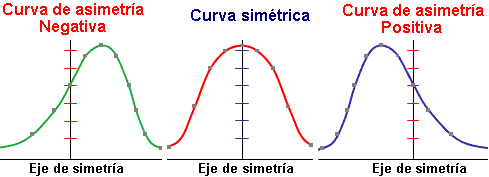

   $$\text{Asimetría} = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3$$

   donde:
    a. $n$ es el tamaño de la muestra,
    b. $\bar{x}$ es la media de la muestra,
    c. $s$ es la desviación estándar de la muestra.


In [ ]:
from scipy.stats import skew

# Lista de valores
valores = data['VALOR']

# Calcular la asimetría
asimetria = skew(valores)

print(f"Asimetría de 'valor': {asimetria}")

### 4.2 Curtosis

El Coeficiente de Curtosis (o grado de apuntamiento de la distribución) analiza el grado de concentración que presentan los valores alrededor de la zona central de la distribución. Se definen 3 tipos de distribuciones según su grado de curtosis:

1. $\mathbf{Distribución\ Leptocúrtica:}$ Presenta un elevado grado de concentración alrededor de los valores centrales de la variable. Curtosis > 0.

2. $\mathbf{Distribución\ Mesocúrtica:}$ Presenta un grado de concentración medio alrededor de losvalores centrales de la variable (el mismo que presenta una distribución normal). Curtosis=0.

3. $\mathbf{Distribución\ Platicúrtica:}$ Presenta un reducido grado de concentración alrededor de los valores centrales de la variable. Curtosis < 0.

   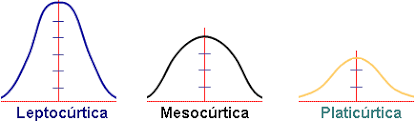

   $$\text{Curtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}$$

   donde:
    a. $n$ es el tamaño de la muestra,
    b. $\bar{x}$ es la media de la muestra,
    c. $s$ es la desviación estándar de la muestra.

In [ ]:
from scipy.stats import kurtosis

# Lista de valores
valores = data['VALOR']

# Calcular la curtosis
curtosis = kurtosis(valores)

print(f"Curtosis de 'valor': {curtosis}")

## 5. Medidas Dependencia

La correlación entre dos variables numéricas es una medida estadística que indica el grado en que dos variables se relacionan linealmente. En otras palabras, la correlación cuantifica la intensidad y la dirección de una relación lineal entre dos variables. Aquí tienes algunos conceptos clave relacionados con la correlación:

Coeficiente de correlación de Pearson $(r):$ Es la medida más común de correlación. Su valor oscila entre -1 y 1, donde:

1. $r=1:$ Indica una correlación positiva perfecta. Cuando una variable aumenta, la otra también aumenta en una proporción constante.

2. $r=−1:$ Indica una correlación negativa perfecta. Cuando una variable aumenta, la otra disminuye en una proporción constante.

3. $r=0:$ Indica que no hay correlación lineal entre las variables.

La fórmula del coeficiente de correlación de Pearson es:

$$r = \frac{n\sum{xy} - \sum{x}\sum{y}}{\sqrt{\left(n\sum{x^2} - (\sum{x})^2\right) \left(n\sum{y^2} - (\sum{y})^2\right)}}$$

donde:
    a. $n$ es el número de pares de datos.
    b. $x$ y $y$ son las variables numéricas.


$\mathbf{Interpretación\ de\ la\ correlación:}$

$\bullet$ Positiva $(0 < r ≤ 1):$ Las variables tienden a aumentar juntas. Una correlación cercana a 1 indica una relación lineal fuerte.

$\bullet$  Negativa $(-1 ≤ r < 0):$ Una variable tiende a aumentar mientras la otra disminuye. Una correlación cercana a -1 indica una relación lineal fuerte.

$\bullet$  Cero $(r ≈ 0):$ No hay una relación lineal significativa entre las variables.



$\mathbf{Correlación\ vs.\ Causalidad:}$ Es importante destacar que la correlación no implica causalidad. Aunque dos variables puedan estar correlacionadas, esto no significa necesariamente que una causa la otra.


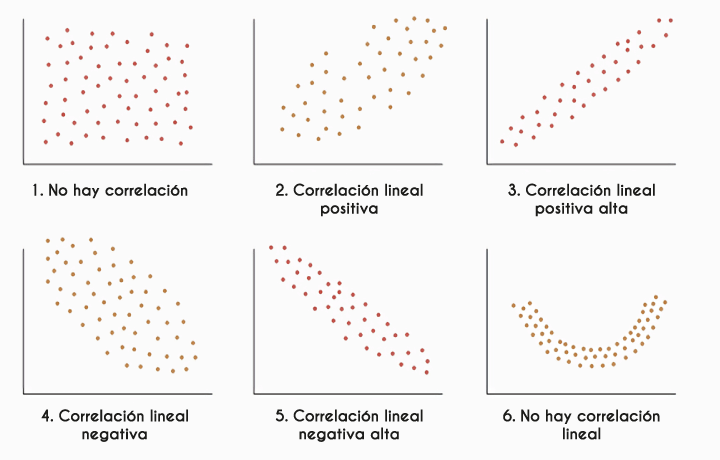


### 5.1 Correlación

A continuación se presenta una tabla de datos sobre el precio de venta y los impuestos anuales de 24 almacenes:

| **Precio de venta/1000** | **Impuestos (local, escolar, condado)/1000** |
|----------------------|------------------------------------------|
| 25.9                 | 4.9176                                   |
| 29.5                 | 5.0208                                   |
| 27.9                 | 4.5429                                   |
| 25.9                 | 4.5573                                   |
| 29.9                 | 5.0597                                   |
| 29.9                 | 3.891                                    |
| 30.9                 | 5.898                                    |
| 28.9                 | 5.6039                                   |
| 35.9                 | 5.8282                                   |
| 31.5                 | 5.3003                                   |
| 31                   | 6.2712                                   |
| 30.9                 | 5.9592                                   |
| 30                   | 5.05                                     |
| 36.9                 | 8.2464                                   |
| 41.9                 | 6.6969                                   |
| 40.5                 | 7.7841                                   |
| 43.9                 | 9.0384                                   |
| 37.5                 | 5.9894                                   |
| 37.9                 | 7.5422                                   |
| 44.5                 | 8.7951                                   |
| 37.9                 | 6.0831                                   |
| 38.9                 | 8.3607                                   |
| 36.9                 | 8.14                                     |
| 45.8                 | 9.1416                                   |


Suponga que resulta apropiado el empleo de un modelo de regresión lineal simple, construya el diagrama de dispersión de las dos variables numéricas y calcule el coeficiente de correlación de Pearson.


In [ ]:
#================================================#
# Lista de precios de venta (divididos por 1000) #
#================================================#
precios_venta = [
    25.9, 29.5, 27.9, 25.9, 29.9, 29.9, 30.9, 28.9, 35.9, 31.5, 
    31, 30.9, 30, 36.9, 41.9, 40.5, 43.9, 37.5, 37.9, 44.5, 
    37.9, 38.9, 36.9, 45.8
]

#=========================================#
# Lista de impuestos (divididos por 1000) #
#=========================================#
impuestos = [
    4.9176, 5.0208, 4.5429, 4.5573, 5.0597, 3.891, 5.898, 5.6039, 
    5.8282, 5.3003, 6.2712, 5.9592, 5.05, 8.2464, 6.6969, 7.7841, 
    9.0384, 5.9894, 7.5422, 8.7951, 6.0831, 8.3607, 8.14, 9.1416
]
 

In [ ]:
#========================#
# Diagrama de Dispersión #
#========================#
import matplotlib.pyplot as plt

#=================================#
# Crear el diagrama de dispersión #
#=================================#
plt.figure(figsize=(10, 6))
plt.scatter(precios_venta, impuestos, color='blue', marker='o')

#====================#
# Etiquetas y título #
#====================#
plt.title('Diagrama de Dispersión')
plt.xlabel('Precio de venta')
plt.ylabel('Impuestos')

#====================#
# Mostrar la gráfica #
#====================#
plt.grid(True)
plt.show() 

In [ ]:
#==================================================#
# Coeficiente de Correlación de Pearson con NUMPAY #
#==================================================#

import numpy as np

correlacion = np.corrcoef(precios_venta, impuestos)[0, 1]

print(f"Coeficiente de correlación de Pearson: {correlacion}")


In [ ]:
#=================================================#
# Coeficiente de Correlación de Pearson con SCIPY #
#=================================================#

from scipy.stats import pearsonr

#===================================================#
# Calcular el coeficiente de correlación de Pearson #
#===================================================#
correlacion, p_valor = pearsonr(precios_venta, impuestos)

print(f"Coeficiente de correlación de Pearson: {correlacion}")
print(f"Valor p: {p_valor}")

## 6. Referencias

    [1]. Lantz, B. (2022). Machine Learning with R and Python: Get hands-on experience in machine learning using Python and R with real-world examples. Packt Publishing.
 
    [2]. Becerra, R., & Huang, Q. (2020). Practical Data Science with Python: Learn hands-on techniques to perform efficient data analysis and data-driven applications using Python. Packt Publishing.
 
    [3]. Grus, J. (2019). Data Science from Scratch: First Principles with Python. O'Reilly Media.
 
    [4]. McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. O'Reilly Media.

# FIN DE ESTADÍSTICA DESCRIPTIVA